In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
metrics_lst =['cumulative_return(rt_v)', 'daily_return(rt_v)', 
              'cumulative_return_fee(rt_v, x_vec, paras["c"])', 'daily_return_fee(rt_v, x_vec, paras["c"])', 
              'max_redraw(rt_v)', 'sharpe_ratio(rt_v, paras["rf"])', 'volatility(rt_v)', 'turnover(rt_v)']

paras = {'c':0.001, 'rf':0.001}

# SNP500

## data

In [3]:
path = './stock_data/data/price/snp500/processed/'
drop_duplicate_path = './stock_data/data/price/snp500/dropped/'
filename = os.listdir(path)
_df = pd.read_csv(drop_duplicate_path + filename[0], index_col='date', parse_dates=True)
df_close = _df.loc[~_df.index.duplicated(), ['close']].rename(columns={'close': (filename[0].split('_')[0])})

# df_close = pd.DataFrame()
for fid in range(1, len(filename)):
    _df = pd.read_csv(drop_duplicate_path + filename[fid], index_col='date', parse_dates=True)

#     print(_df.index.duplicated().sum())
    df_close = pd.concat([df_close, _df.loc[~_df.index.duplicated(), ['close']].rename(
        columns={'close': (filename[fid].split('_')[0])})], join='outer', axis=1, sort=True)
df_close = df_close.fillna(method='bfill')

In [4]:
data = df_close[-1200:].to_numpy()

In [5]:
for i in list(range(0, len(data)))[::-1]:
    data[i, :] = data[i, :] / data[0, :]
# data = data[-1200:]

In [6]:
data = pd.DataFrame(data)

<AxesSubplot:>

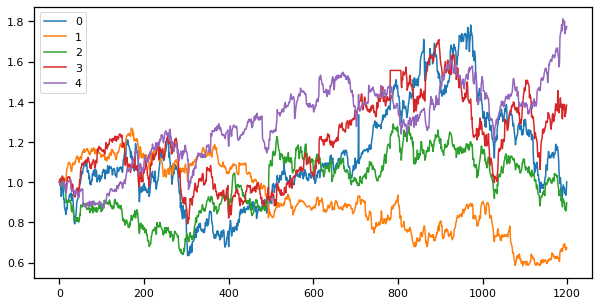

In [7]:
# plot first three of them as example
data.iloc[:,:5].plot()

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,422
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991746,1.017239,0.990993,1.012957,0.995050,1.010067,1.011844,0.999663,1.008747,1.006007,...,1.011151,1.010952,1.001453,1.002532,0.989202,1.003808,1.018555,1.000000,1.002643,1.010101
2,0.982666,1.010747,1.004596,1.000166,0.989081,1.005909,1.013039,1.003119,1.006174,0.995100,...,1.007603,1.007436,0.969089,0.996150,0.985371,1.010156,1.022898,1.000000,1.002846,1.019769
3,0.987103,1.017463,0.996875,0.998671,0.983986,1.004486,1.011098,1.004776,1.006432,0.993677,...,1.005322,1.012393,0.954293,0.994356,0.986764,1.008569,1.023885,1.013362,1.002948,1.031457
4,0.929530,1.022725,0.985846,1.014950,0.983986,1.012036,1.013188,1.008907,1.016980,1.009010,...,0.995692,1.011010,0.846631,0.993776,1.002264,1.006982,1.030004,1.014820,1.004066,1.046032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.944284,0.674354,0.863051,1.326910,1.738681,2.069373,0.371454,1.144250,1.040134,1.681789,...,1.496452,1.411575,0.273316,1.034865,1.560084,1.490638,0.916700,0.486395,0.909220,0.517172
1196,0.950062,0.680175,0.871324,1.343189,1.774203,2.095634,0.373644,1.139249,1.046308,1.681948,...,1.523822,1.424775,0.277411,1.053062,1.581853,1.497620,0.920647,0.492711,0.920403,0.519481
1197,0.935411,0.662599,0.856801,1.345847,1.759499,2.091476,0.372449,1.153410,1.026756,1.676257,...,1.510644,1.415437,0.276882,1.044728,1.579067,1.509362,0.910778,0.493683,0.915523,0.514286
1198,0.956046,0.665846,0.869485,1.373422,1.762265,2.085020,0.373395,1.162766,1.025212,1.710085,...,1.540547,1.380620,0.285733,1.057123,1.560954,1.523326,0.906040,0.498542,0.921419,0.525253


## baselines

### BAH

In [9]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.65 ± 0.50
    Ulcer index: 1.92
    Information ratio (wrt UCRP): 0.61
    Appraisal ratio (wrt UCRP): 0.36 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 0.99 / 1.323%
    Annualized return: 8.55%
    Annualized volatility: 14.06%
    Longest drawdown: 241 days
    Max drawdown: 21.77%
    Winning days: 54.8%
    Annual turnover: 0.0
        
Total wealth: 1.478083803528782


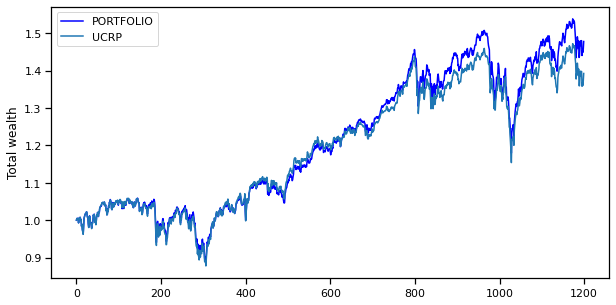

In [10]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [11]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.09
    Sharpe ratio: 0.57 ± 0.49
    Ulcer index: 1.63
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): 0.00 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 7.20%
    Annualized volatility: 14.03%
    Longest drawdown: 259 days
    Max drawdown: 20.94%
    Winning days: 54.1%
    Annual turnover: 2.4
        
Total wealth: 1.3925468496403712


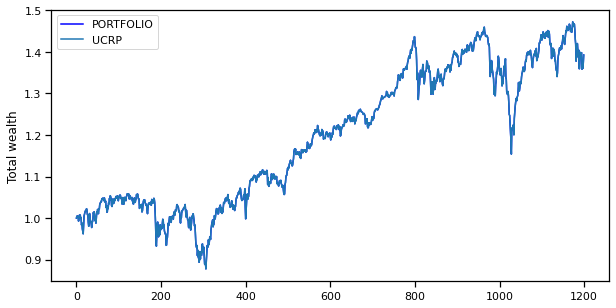

In [12]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.52 ± 0.49
    Ulcer index: 1.45
    Information ratio (wrt UCRP): -5.75
    Appraisal ratio (wrt UCRP): -0.39 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.00 / -0.656%
    Annualized return: 6.50%
    Annualized volatility: 14.03%
    Longest drawdown: 262 days
    Max drawdown: 21.09%
    Winning days: 53.8%
    Annual turnover: 2.4
        
Total wealth: 1.3497931966519274


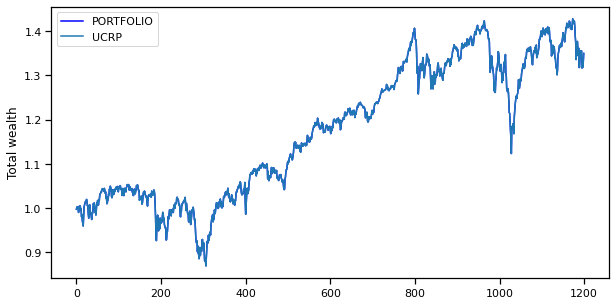

In [13]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.07
    Sharpe ratio: 0.47 ± 0.48
    Ulcer index: 1.28
    Information ratio (wrt UCRP): -5.75
    Appraisal ratio (wrt UCRP): -0.72 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.00 / -1.311%
    Annualized return: 5.81%
    Annualized volatility: 14.03%
    Longest drawdown: 288 days
    Max drawdown: 21.24%
    Winning days: 53.7%
    Annual turnover: 2.4
        
Total wealth: 1.3083429752096043


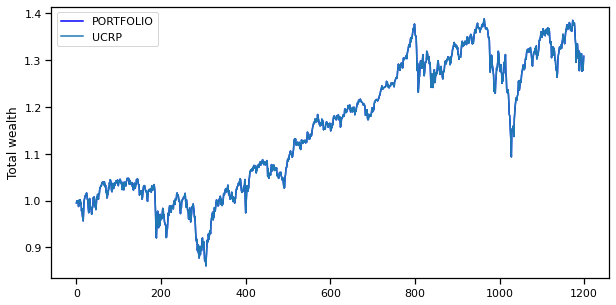

In [14]:
result.fee = 0.0050
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [15]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.24
    Sharpe ratio: 1.04 ± 0.57
    Ulcer index: 5.18
    Information ratio (wrt UCRP): 0.95
    Appraisal ratio (wrt UCRP): 0.85 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.41 / 37.996%
    Annualized return: 48.76%
    Annualized volatility: 47.53%
    Longest drawdown: 187 days
    Max drawdown: 34.62%
    Winning days: 52.6%
    Annual turnover: 374.8
        
Total wealth: 6.626955567980023


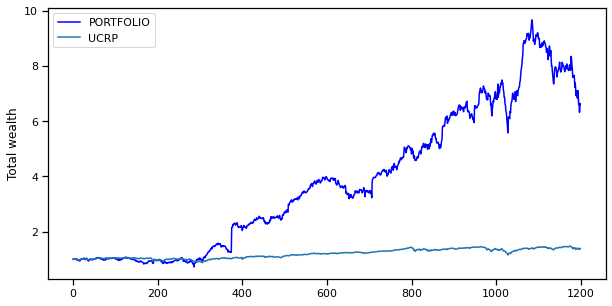

In [16]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.76
    Sharpe ratio: -0.88 ± 0.54
    Ulcer index: -0.63
    Information ratio (wrt UCRP): -1.15
    Appraisal ratio (wrt UCRP): -1.19 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.40 / -52.466%
    Annualized return: -39.71%
    Annualized volatility: 46.88%
    Longest drawdown: 1199 days
    Max drawdown: 91.37%
    Winning days: 41.5%
    Annual turnover: 374.8
        
Total wealth: 0.08983958166107156


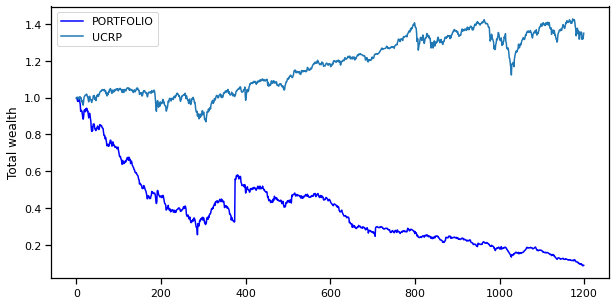

In [17]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.47
    Sharpe ratio: -2.85 ± 1.03
    Ulcer index: -1.47
    Information ratio (wrt UCRP): -3.30
    Appraisal ratio (wrt UCRP): -3.28 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.39 / -142.929%
    Annualized return: -75.65%
    Annualized volatility: 46.27%
    Longest drawdown: 1199 days
    Max drawdown: 99.88%
    Winning days: 32.2%
    Annual turnover: 374.8
        
Total wealth: 0.001197887280798967


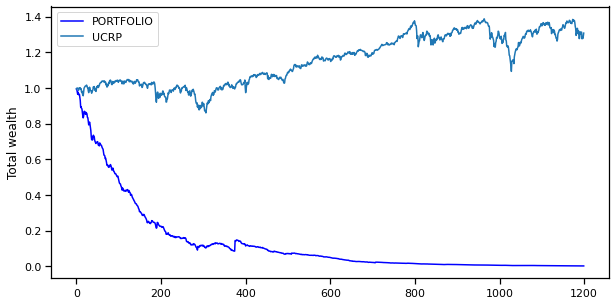

In [18]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [19]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.35
    Sharpe ratio: 1.43 ± 0.65
    Ulcer index: 8.83
    Information ratio (wrt UCRP): 1.37
    Appraisal ratio (wrt UCRP): 1.29 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.42 / 91.363%
    Annualized return: 126.57%
    Annualized volatility: 71.81%
    Longest drawdown: 183 days
    Max drawdown: 36.91%
    Winning days: 54.4%
    Annual turnover: 317.3
        
Total wealth: 49.14281706339869


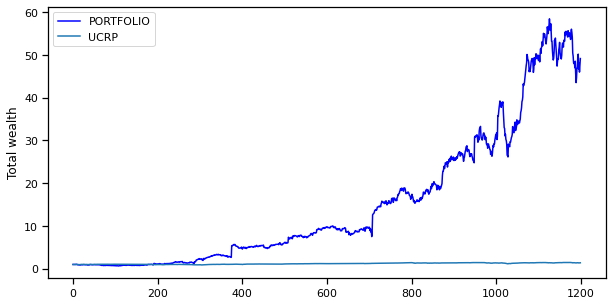

In [20]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.03
    Sharpe ratio: 0.38 ± 0.47
    Ulcer index: 1.09
    Information ratio (wrt UCRP): 0.28
    Appraisal ratio (wrt UCRP): 0.22 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.43 / 15.599%
    Annualized return: 6.98%
    Annualized volatility: 70.80%
    Longest drawdown: 392 days
    Max drawdown: 53.04%
    Winning days: 47.8%
    Annual turnover: 317.3
        
Total wealth: 1.379187629557799


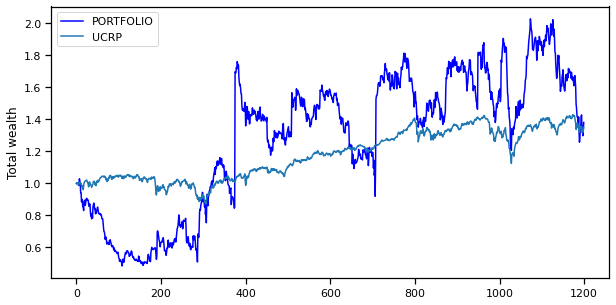

In [21]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.78
    Sharpe ratio: -0.70 ± 0.51
    Ulcer index: -0.63
    Information ratio (wrt UCRP): -0.84
    Appraisal ratio (wrt UCRP): -0.88 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.43 / -60.165%
    Annualized return: -49.66%
    Annualized volatility: 69.95%
    Longest drawdown: 1192 days
    Max drawdown: 96.48%
    Winning days: 41.8%
    Annual turnover: 317.3
        
Total wealth: 0.03807154050943597


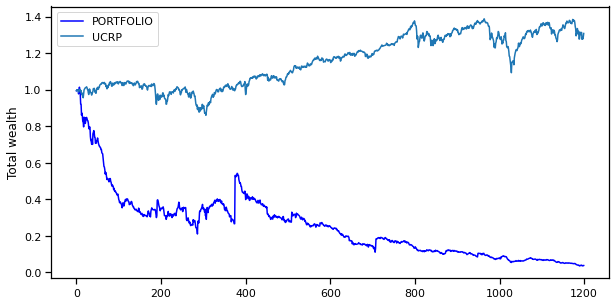

In [22]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

# NYSE (O)

## data

<AxesSubplot:>

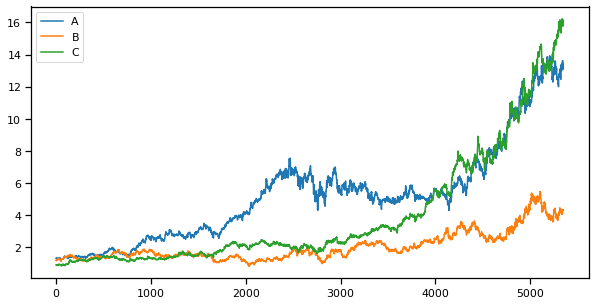

In [23]:
# load data using tools module
data = tools.dataset('nyse_o')
data = data.iloc[300:, :].reset_index(drop=True) 
# plot first three of them as example
data.iloc[:,:3].plot()

In [24]:
data

,A,B,C,D,E,F,G,H,I,J,...,[,\,],^,_,`,a,b,c,d
0,1.307988,1.188333,0.914608,1.179447,1.346246,1.283926,1.419820,1.460459,0.753528,1.482258,...,1.557640,1.368139,1.552198,1.073619,1.262640,1.190875,1.023857,1.548544,1.131063,1.486487
1,1.336764,1.211957,0.910566,1.173927,1.346246,1.259236,1.410932,1.458984,0.777075,1.492782,...,1.553824,1.376074,1.549512,1.050965,1.268612,1.160829,1.031822,1.546562,1.134241,1.476185
2,1.347231,1.207231,0.910566,1.182215,1.349544,1.246895,1.416858,1.462660,0.769227,1.498051,...,1.563349,1.384014,1.573685,1.057933,1.258653,1.201795,1.039788,1.560388,1.135829,1.468450
3,1.352458,1.209597,0.882238,1.176694,1.346251,1.259239,1.410935,1.464869,0.792773,1.503310,...,1.570978,1.389301,1.584433,1.044339,1.258653,1.201795,1.039788,1.544582,1.124709,1.476174
4,1.344614,1.214326,0.878188,1.190509,1.354504,1.259239,1.413898,1.469293,0.800621,1.516478,...,1.548104,1.370782,1.600547,1.023170,1.258653,1.201795,1.039788,1.550513,1.146945,1.463287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,13.363088,4.332372,15.975170,16.710408,13.384216,52.126458,8.800101,2.964797,14.203320,13.998756,...,14.277373,6.064718,16.126495,53.804543,6.914765,15.476528,42.562995,4.278911,6.303800,5.388019
5347,13.363088,4.317685,15.849925,16.710408,13.277142,52.126458,8.760325,2.949321,13.872951,13.998756,...,14.200560,6.055197,15.705755,53.468802,6.945329,15.613031,41.856024,4.262181,6.332986,5.427513
5348,13.233333,4.303005,15.787317,16.806159,13.250322,52.126458,8.680693,2.980289,13.212321,13.959420,...,14.219731,6.026677,15.705755,52.965126,6.960608,15.749645,41.856024,4.228765,6.362182,5.388055
5349,13.136068,4.332394,15.787317,16.949852,13.357385,52.394388,8.640849,3.019003,13.460052,14.077377,...,14.315714,6.007692,15.775803,53.804624,6.945295,15.795161,42.421499,4.195316,6.537269,5.407775


## baselines

### BAH

In [25]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.14
    Sharpe ratio: 0.84 ± 0.25
    Ulcer index: 1.19
    Information ratio (wrt UCRP): -0.46
    Appraisal ratio (wrt UCRP): -0.51 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.07 / -3.212%
    Annualized return: 12.34%
    Annualized volatility: 15.22%
    Longest drawdown: 672 days
    Max drawdown: 42.22%
    Winning days: 52.0%
    Annual turnover: 0.0
        
Total wealth: 11.834448218898565


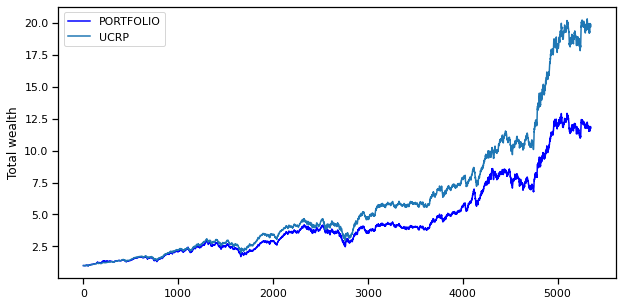

In [26]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [27]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.11 ± 0.28
    Ulcer index: 1.83
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): 0.00 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 15.11%
    Annualized volatility: 13.55%
    Longest drawdown: 570 days
    Max drawdown: 36.60%
    Winning days: 53.4%
    Annual turnover: 2.9
        
Total wealth: 19.862476800200408


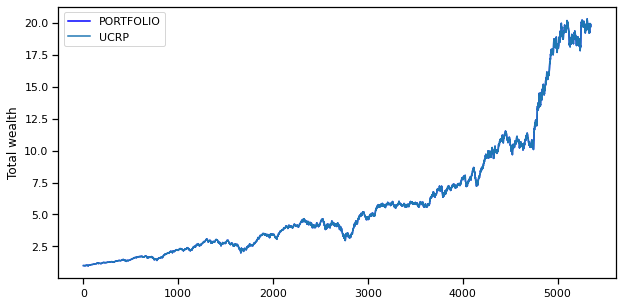

In [28]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.18
    Sharpe ratio: 1.05 ± 0.27
    Ulcer index: 1.67
    Information ratio (wrt UCRP): -13.50
    Appraisal ratio (wrt UCRP): -0.45 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.00 / -0.742%
    Annualized return: 14.26%
    Annualized volatility: 13.55%
    Longest drawdown: 581 days
    Max drawdown: 37.55%
    Winning days: 53.3%
    Annual turnover: 2.9
        
Total wealth: 16.956696478671653


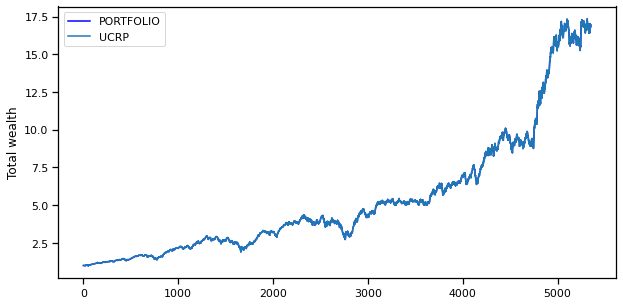

In [29]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.17
    Sharpe ratio: 1.00 ± 0.27
    Ulcer index: 1.52
    Information ratio (wrt UCRP): -13.50
    Appraisal ratio (wrt UCRP): -0.87 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.00 / -1.484%
    Annualized return: 13.41%
    Annualized volatility: 13.54%
    Longest drawdown: 588 days
    Max drawdown: 38.49%
    Winning days: 53.1%
    Annual turnover: 2.9
        
Total wealth: 14.475855369465405


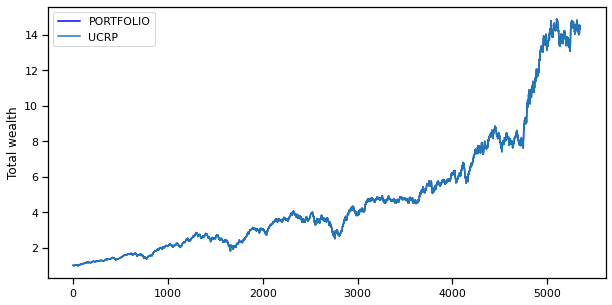

In [30]:
result.fee = 0.0050
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [31]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.91
    Sharpe ratio: 3.40 ± 0.56
    Ulcer index: 24.92
    Information ratio (wrt UCRP): 3.34
    Appraisal ratio (wrt UCRP): 3.11 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.45 / 150.490%
    Annualized return: 391.97%
    Annualized volatility: 50.70%
    Longest drawdown: 211 days
    Max drawdown: 32.86%
    Winning days: 57.1%
    Annual turnover: 437.4
        
Total wealth: 492758945400743.7


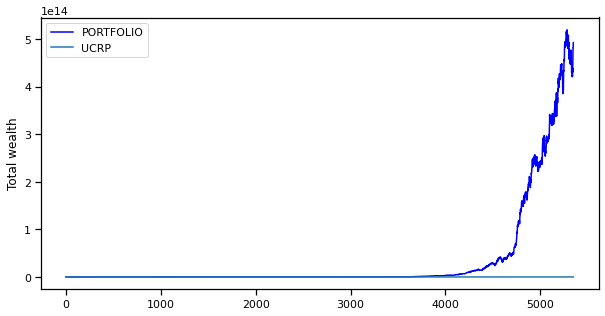

In [32]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.23
    Sharpe ratio: 1.30 ± 0.30
    Ulcer index: 2.03
    Information ratio (wrt UCRP): 1.08
    Appraisal ratio (wrt UCRP): 0.91 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.45 / 42.771%
    Annualized return: 69.20%
    Annualized volatility: 49.49%
    Longest drawdown: 1384 days
    Max drawdown: 79.28%
    Winning days: 42.9%
    Annual turnover: 437.4
        
Total wealth: 70777.1485819206


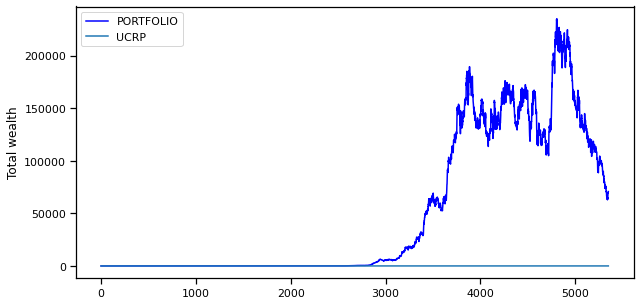

In [33]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.81
    Sharpe ratio: -0.89 ± 0.26
    Ulcer index: -0.47
    Information ratio (wrt UCRP): -1.31
    Appraisal ratio (wrt UCRP): -1.42 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.45 / -64.948%
    Annualized return: -42.10%
    Annualized volatility: 48.35%
    Longest drawdown: 5111 days
    Max drawdown: 100.00%
    Winning days: 35.6%
    Annual turnover: 437.4
        
Total wealth: 9.143650075065281e-06


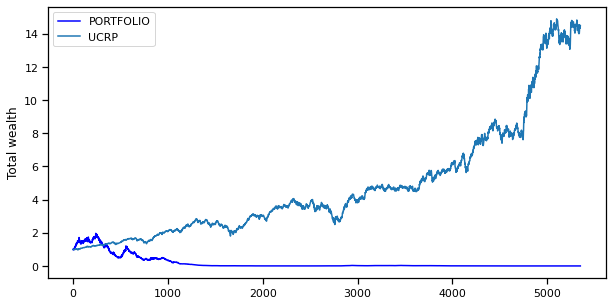

In [34]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [35]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.86
    Sharpe ratio: 3.29 ± 0.55
    Ulcer index: 22.39
    Information ratio (wrt UCRP): 3.22
    Appraisal ratio (wrt UCRP): 3.01 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.54 / 161.896%
    Annualized return: 442.32%
    Annualized volatility: 56.23%
    Longest drawdown: 185 days
    Max drawdown: 46.29%
    Winning days: 58.0%
    Annual turnover: 349.4
        
Total wealth: 3901916865980302.5


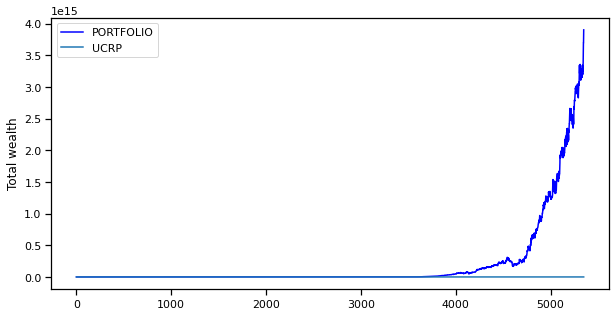

In [36]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.37
    Sharpe ratio: 1.81 ± 0.35
    Ulcer index: 5.75
    Information ratio (wrt UCRP): 1.64
    Appraisal ratio (wrt UCRP): 1.45 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.53 / 75.511%
    Annualized return: 131.43%
    Annualized volatility: 54.53%
    Longest drawdown: 1334 days
    Max drawdown: 59.99%
    Winning days: 47.0%
    Annual turnover: 349.4
        
Total wealth: 54717346.35372524


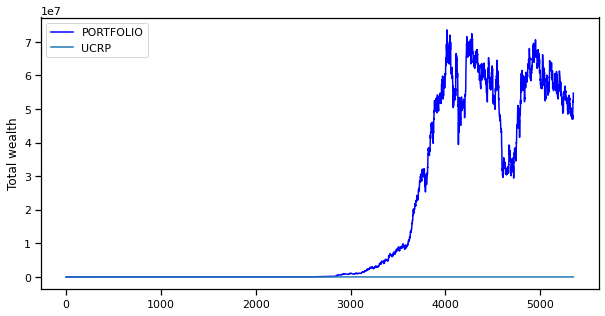

In [37]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.99
    Sharpe ratio: 0.23 ± 0.22
    Ulcer index: 0.21
    Information ratio (wrt UCRP): -0.06
    Appraisal ratio (wrt UCRP): -0.22 ± 0.22
    UCRP sharpe: 1.11 ± 0.28
    Beta / Alpha: 1.53 / -10.874%
    Annualized return: -1.65%
    Annualized volatility: 53.03%
    Longest drawdown: 1936 days
    Max drawdown: 99.32%
    Winning days: 40.4%
    Annual turnover: 349.4
        
Total wealth: 0.7016743472829194


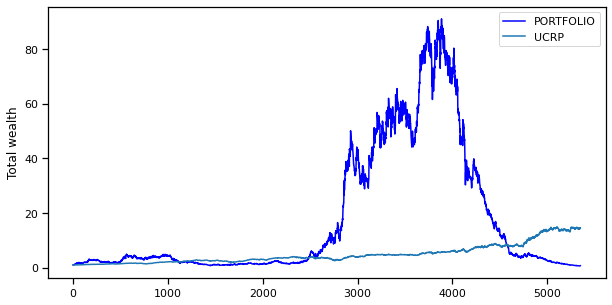

In [38]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

# NYSE (N)

## data

<AxesSubplot:>

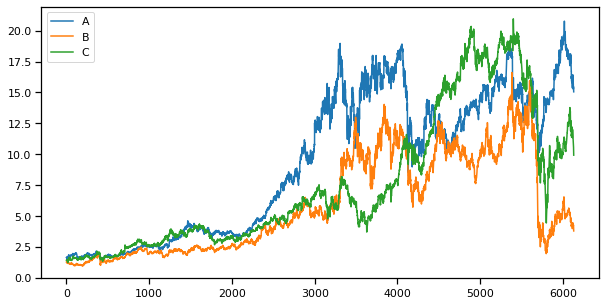

In [103]:
# load data using tools module
data = tools.dataset('nyse_n')
data = data.iloc[300:, :].reset_index(drop=True) 
# plot first three of them as example
data.iloc[:,:3].plot()

In [104]:
data

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,1.633943,1.257179,1.396510,1.689183,1.541052,1.944837,1.563963,1.695560,1.424722,1.147795,...,1.483340,1.799591,0.866645,1.285878,1.683497,1.361903,1.404987,1.274175,0.862210,2.106248
1,1.649726,1.250139,1.432246,1.727055,1.526443,1.949621,1.563963,1.683929,1.420106,1.129913,...,1.476205,1.846381,0.899976,1.249925,1.713783,1.355189,1.398538,1.313598,0.855382,2.087881
2,1.623430,1.260703,1.434352,1.754463,1.526443,1.944845,1.572049,1.701475,1.413176,1.140647,...,1.504828,1.862887,0.933311,1.258225,1.708282,1.363578,1.461235,1.360034,0.841687,2.129242
3,1.639210,1.288905,1.468016,1.832396,1.511743,1.987962,1.666246,1.713113,1.440846,1.144217,...,1.547867,1.953684,0.899983,1.285880,1.781294,1.390413,1.530380,1.411090,0.855381,2.147639
4,1.602377,1.246629,1.446965,1.794466,1.467721,1.992753,1.636654,1.698518,1.429363,1.160305,...,1.529958,1.871141,0.899983,1.319056,1.757852,1.371962,1.504655,1.397162,0.862207,2.106232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,15.262335,4.197488,10.679824,33.869485,14.257315,9.699679,10.831698,10.000294,12.865341,0.040662,...,44.316041,20.060604,1.992866,0.448270,29.314446,17.080096,81.836564,17.722527,10.744335,33.968993
6127,15.474311,4.235303,10.705192,32.823324,14.257315,9.699679,10.861374,10.000294,12.779572,0.040662,...,43.646839,19.930761,2.154450,0.448270,29.561478,17.255052,82.254098,17.399766,10.951319,33.874107
6128,15.368323,4.159673,10.552986,33.346405,13.861278,9.854256,10.742670,9.719912,12.865341,0.040662,...,44.167329,20.028143,2.046727,0.439122,29.561478,17.255052,84.759299,17.634501,10.781969,33.684337
6129,15.050358,3.894966,10.121734,32.888709,13.267224,9.313238,10.445912,9.159148,12.350727,0.040662,...,44.018618,19.768459,2.019796,0.402528,29.149758,17.145704,83.089165,17.546476,10.349185,33.399680


## baselines

### BAH

In [105]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.65 ± 0.22
    Ulcer index: 1.01
    Information ratio (wrt UCRP): -0.44
    Appraisal ratio (wrt UCRP): -0.15 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 0.89 / -1.052%
    Annualized return: 10.78%
    Annualized volatility: 18.19%
    Longest drawdown: 750 days
    Max drawdown: 54.74%
    Winning days: 53.6%
    Annual turnover: 0.0
        
Total wealth: 12.07318834620408


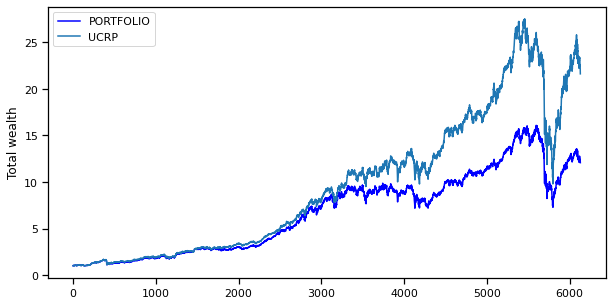

In [106]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [107]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.13
    Sharpe ratio: 0.75 ± 0.23
    Ulcer index: 1.24
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): 0.00 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 13.47%
    Annualized volatility: 19.44%
    Longest drawdown: 672 days
    Max drawdown: 64.43%
    Winning days: 54.6%
    Annual turnover: 3.1
        
Total wealth: 21.617674941689195


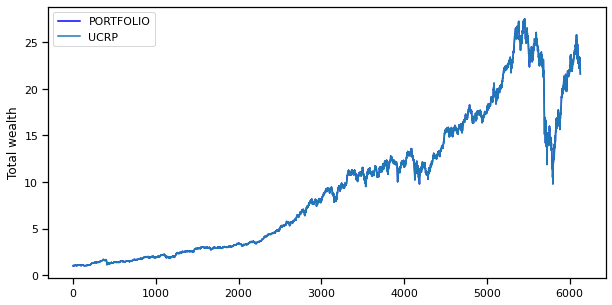

In [108]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.12
    Sharpe ratio: 0.71 ± 0.23
    Ulcer index: 1.14
    Information ratio (wrt UCRP): -14.22
    Appraisal ratio (wrt UCRP): -0.48 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.00 / -0.781%
    Annualized return: 12.58%
    Annualized volatility: 19.43%
    Longest drawdown: 672 days
    Max drawdown: 65.00%
    Winning days: 54.5%
    Annual turnover: 3.1
        
Total wealth: 17.873563228889815


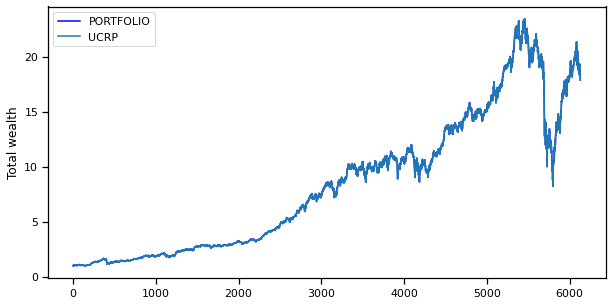

In [109]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.67 ± 0.22
    Ulcer index: 1.05
    Information ratio (wrt UCRP): -14.22
    Appraisal ratio (wrt UCRP): -0.92 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.00 / -1.562%
    Annualized return: 11.71%
    Annualized volatility: 19.43%
    Longest drawdown: 672 days
    Max drawdown: 65.55%
    Winning days: 54.3%
    Annual turnover: 3.1
        
Total wealth: 14.777723240828752


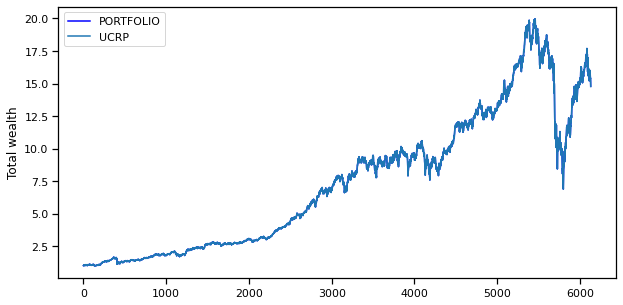

In [110]:
result.fee = 0.0050
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [111]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.26
    Sharpe ratio: 1.36 ± 0.28
    Ulcer index: 3.84
    Information ratio (wrt UCRP): 1.22
    Appraisal ratio (wrt UCRP): 1.10 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.26 / 49.098%
    Annualized return: 73.94%
    Annualized volatility: 49.41%
    Longest drawdown: 588 days
    Max drawdown: 77.09%
    Winning days: 53.4%
    Annual turnover: 431.8
        
Total wealth: 706090.2488116791


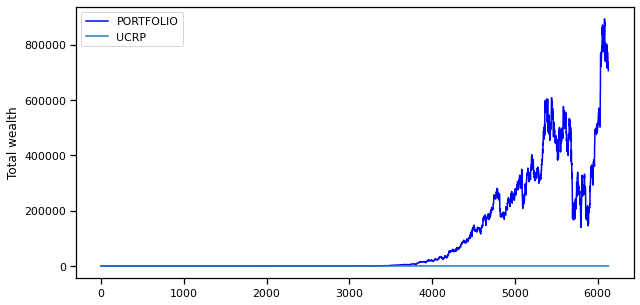

In [112]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.81
    Sharpe ratio: -0.81 ± 0.23
    Ulcer index: -0.42
    Information ratio (wrt UCRP): -1.28
    Appraisal ratio (wrt UCRP): -1.33 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.25 / -57.258%
    Annualized return: -39.63%
    Annualized volatility: 48.12%
    Longest drawdown: 6117 days
    Max drawdown: 100.00%
    Winning days: 40.2%
    Annual turnover: 431.8
        
Total wealth: 4.64882146921604e-06


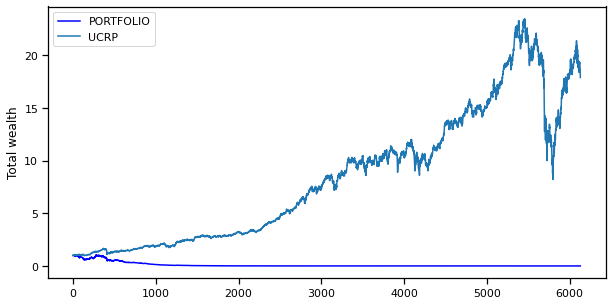

In [113]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.52
    Sharpe ratio: -3.10 ± 0.49
    Ulcer index: -1.49
    Information ratio (wrt UCRP): -3.96
    Appraisal ratio (wrt UCRP): -3.92 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.25 / -163.613%
    Annualized return: -79.15%
    Annualized volatility: 46.93%
    Longest drawdown: 6130 days
    Max drawdown: 100.00%
    Winning days: 31.4%
    Annual turnover: 431.8
        
Total wealth: 2.7085367976661392e-17


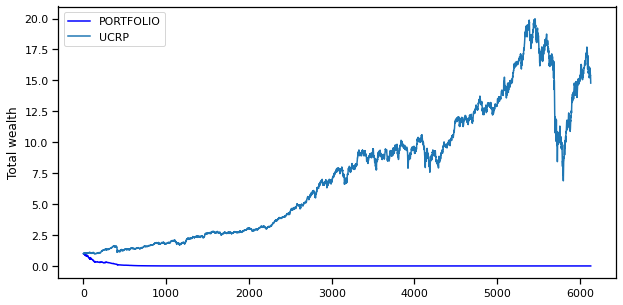

In [114]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [115]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.35
    Sharpe ratio: 1.65 ± 0.31
    Ulcer index: 4.17
    Information ratio (wrt UCRP): 1.56
    Appraisal ratio (wrt UCRP): 1.43 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.35 / 76.114%
    Annualized return: 120.71%
    Annualized volatility: 57.87%
    Longest drawdown: 826 days
    Max drawdown: 91.98%
    Winning days: 55.0%
    Annual turnover: 320.3
        
Total wealth: 231835756.05213922


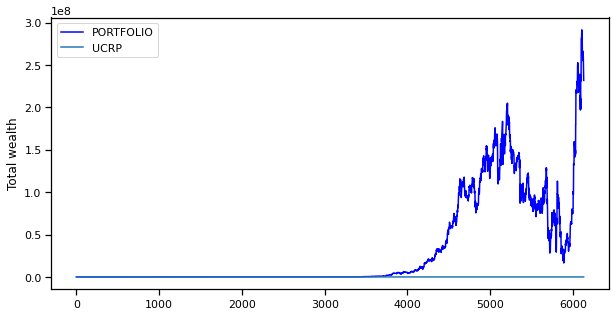

In [116]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.00
    Sharpe ratio: 0.29 ± 0.21
    Ulcer index: 0.29
    Information ratio (wrt UCRP): 0.04
    Appraisal ratio (wrt UCRP): -0.06 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.35 / -3.088%
    Annualized return: 0.89%
    Annualized volatility: 56.36%
    Longest drawdown: 2600 days
    Max drawdown: 99.56%
    Winning days: 46.7%
    Annual turnover: 320.3
        
Total wealth: 1.2411676086239865


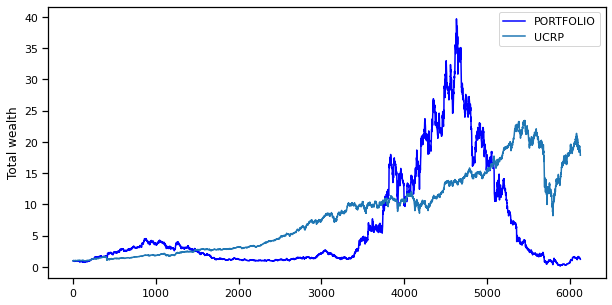

In [117]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.74
    Sharpe ratio: -1.14 ± 0.26
    Ulcer index: -0.67
    Information ratio (wrt UCRP): -1.58
    Appraisal ratio (wrt UCRP): -1.64 ± 0.20
    UCRP sharpe: 0.75 ± 0.23
    Beta / Alpha: 1.34 / -82.290%
    Annualized return: -54.06%
    Annualized volatility: 55.07%
    Longest drawdown: 6127 days
    Max drawdown: 100.00%
    Winning days: 39.8%
    Annual turnover: 320.3
        
Total wealth: 6.045023421543763e-09


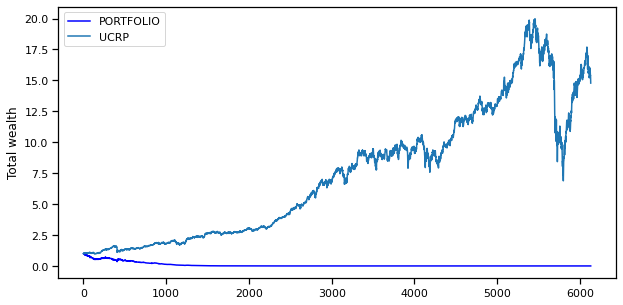

In [118]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

# TSE

## data

<AxesSubplot:>

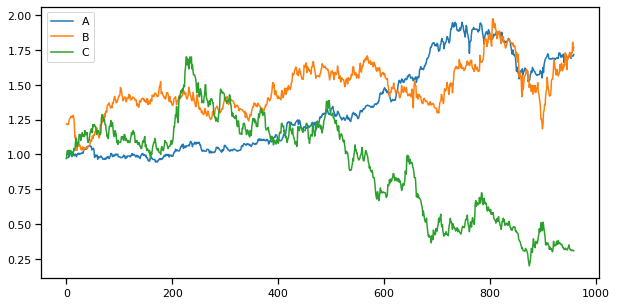

In [39]:
data = tools.dataset('tse')

data = data.iloc[300:, :].reset_index(drop=True) 
# plot first three of them as example
data.iloc[:,:3].plot()

In [40]:
data

,A,B,C,D,E,F,G,H,I,J,...,,,,,,,,,,
0,0.972638,1.218015,0.971415,0.956757,1.088995,0.831872,1.143538,1.002723,1.007510,0.997794,...,0.437626,1.265467,0.900394,0.765242,1.277985,0.930161,1.094841,1.450017,2.236967,0.877680
1,0.978610,1.218015,1.014274,0.950204,1.096509,0.823252,1.143538,1.013563,1.013656,1.006705,...,0.426007,1.259412,0.909047,0.756545,1.291774,0.930161,1.081069,1.425018,2.204070,0.871005
2,0.978610,1.214464,1.028555,0.950204,1.104020,0.814631,1.143538,1.024398,1.013656,0.988887,...,0.406643,1.283631,0.917701,0.773938,1.305570,0.944923,1.087955,1.450013,2.171175,0.891030
3,0.978610,1.218011,0.999983,0.950204,1.081489,0.806011,1.159205,1.008137,1.019799,0.988887,...,0.402770,1.301794,0.943672,0.773938,1.314762,0.937541,1.060413,1.425013,2.105381,0.881018
4,0.978610,1.218011,1.028553,0.950204,1.081489,0.823251,1.159205,0.997297,1.013656,0.979978,...,0.395024,1.301794,0.952325,0.782638,1.319363,0.930159,1.046641,1.425013,2.072485,0.887696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1.709509,1.731276,0.309720,1.425260,2.498877,0.903328,4.154285,0.484345,2.842353,2.029976,...,0.184673,4.382357,0.910744,0.451729,1.624094,0.357779,2.008721,1.199974,2.105369,0.794756
955,1.706694,1.729760,0.314291,1.431531,2.488814,0.906779,4.099141,0.495611,2.892180,2.021149,...,0.176781,4.412507,0.900356,0.442871,1.653653,0.366799,1.979006,1.229973,2.092211,0.813941
956,1.706694,1.805627,0.310862,1.433421,2.482107,0.887815,4.043995,0.488853,2.969661,2.021149,...,0.164154,4.422568,0.928060,0.451729,1.651682,0.375819,1.967120,1.219974,2.144851,0.829015
957,1.706694,1.744934,0.312006,1.423886,2.371417,0.886091,4.043995,0.473084,2.961358,2.007911,...,0.162575,4.312004,0.910745,0.442871,1.645769,0.378825,1.943347,1.219974,2.171168,0.811202


## baselines

### BAH

In [41]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.00 ± 0.63
    Ulcer index: 1.63
    Information ratio (wrt UCRP): 0.46
    Appraisal ratio (wrt UCRP): 0.40 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 0.97 / 1.972%
    Annualized return: 13.42%
    Annualized volatility: 13.47%
    Longest drawdown: 174 days
    Max drawdown: 29.69%
    Winning days: 56.9%
    Annual turnover: 0.0
        
Total wealth: 1.6147573722395792


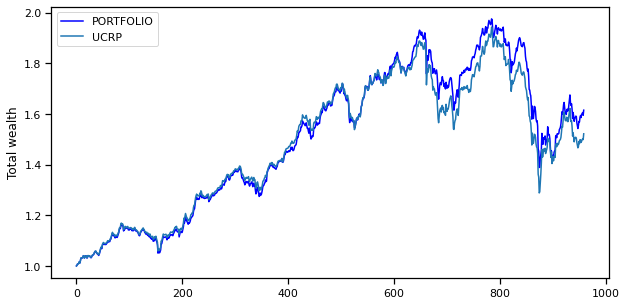

In [42]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [43]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.17
    Sharpe ratio: 0.88 ± 0.60
    Ulcer index: 1.31
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): -0.00 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 11.66%
    Annualized volatility: 13.51%
    Longest drawdown: 174 days
    Max drawdown: 33.68%
    Winning days: 57.9%
    Annual turnover: 3.6
        
Total wealth: 1.5215861319911461


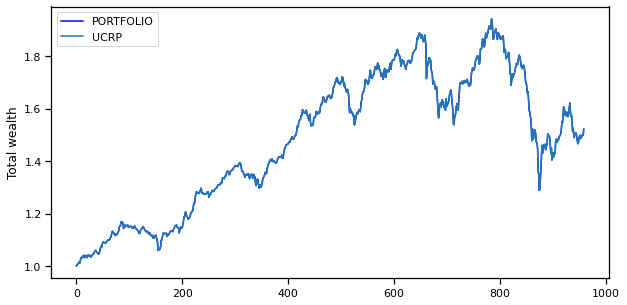

In [44]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.81 ± 0.59
    Ulcer index: 1.18
    Information ratio (wrt UCRP): -7.54
    Appraisal ratio (wrt UCRP): -0.56 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.00 / -0.961%
    Annualized return: 10.59%
    Annualized volatility: 13.51%
    Longest drawdown: 174 days
    Max drawdown: 33.93%
    Winning days: 57.8%
    Annual turnover: 3.6
        
Total wealth: 1.4668832006183286


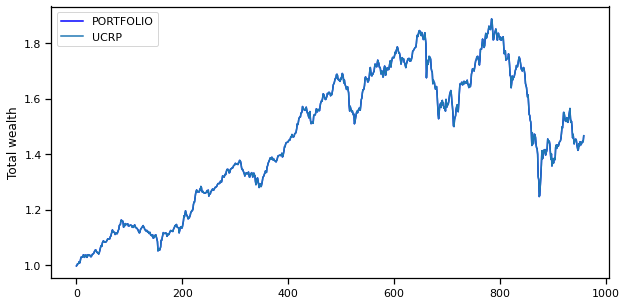

In [45]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.13
    Sharpe ratio: 0.74 ± 0.58
    Ulcer index: 1.06
    Information ratio (wrt UCRP): -7.54
    Appraisal ratio (wrt UCRP): -1.04 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.00 / -1.923%
    Annualized return: 9.53%
    Annualized volatility: 13.51%
    Longest drawdown: 174 days
    Max drawdown: 34.17%
    Winning days: 57.5%
    Annual turnover: 3.6
        
Total wealth: 1.4141361298749862


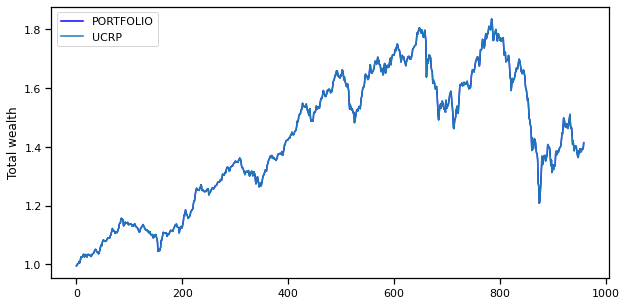

In [46]:
result.fee = 0.0050
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [47]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.38
    Sharpe ratio: 1.66 ± 0.79
    Ulcer index: 4.91
    Information ratio (wrt UCRP): 1.57
    Appraisal ratio (wrt UCRP): 1.43 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.79 / 106.636%
    Annualized return: 173.51%
    Annualized volatility: 77.03%
    Longest drawdown: 342 days
    Max drawdown: 64.86%
    Winning days: 57.2%
    Annual turnover: 397.6
        
Total wealth: 46.02047015588988


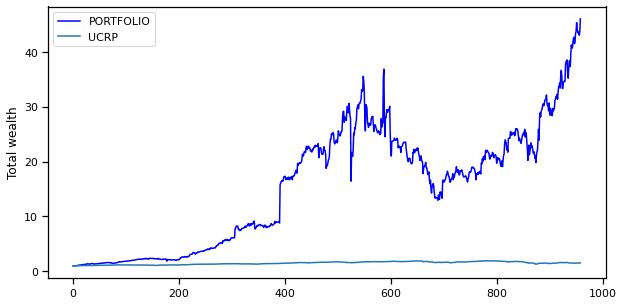

In [48]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.01
    Sharpe ratio: 0.41 ± 0.53
    Ulcer index: 0.68
    Information ratio (wrt UCRP): 0.26
    Appraisal ratio (wrt UCRP): 0.13 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.78 / 9.467%
    Annualized return: 4.43%
    Annualized volatility: 75.91%
    Longest drawdown: 410 days
    Max drawdown: 82.62%
    Winning days: 48.7%
    Annual turnover: 397.6
        
Total wealth: 1.1791523643538948


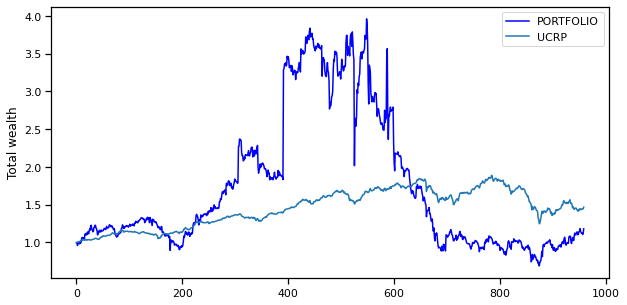

In [49]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.74
    Sharpe ratio: -0.89 ± 0.61
    Ulcer index: -0.95
    Information ratio (wrt UCRP): -1.09
    Appraisal ratio (wrt UCRP): -1.21 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 1.78 / -87.702%
    Annualized return: -60.29%
    Annualized volatility: 74.84%
    Longest drawdown: 930 days
    Max drawdown: 97.83%
    Winning days: 38.8%
    Annual turnover: 397.6
        
Total wealth: 0.029748674657037583


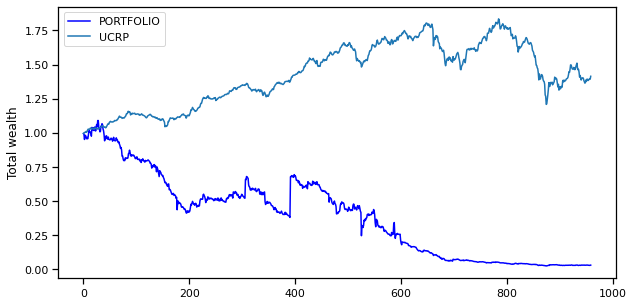

In [50]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [51]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.15
    Sharpe ratio: 1.06 ± 0.64
    Ulcer index: 2.37
    Information ratio (wrt UCRP): 0.97
    Appraisal ratio (wrt UCRP): 0.83 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 2.07 / 82.631%
    Annualized return: 81.52%
    Annualized volatility: 101.46%
    Longest drawdown: 511 days
    Max drawdown: 82.01%
    Winning days: 54.4%
    Annual turnover: 330.1
        
Total wealth: 9.66920142050422


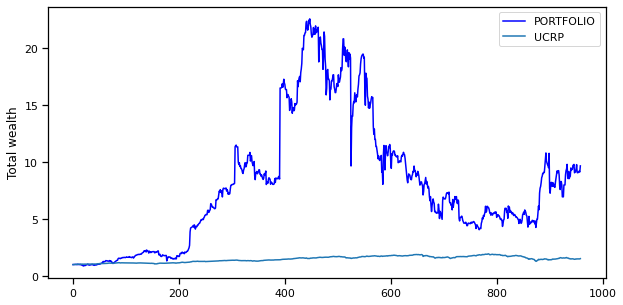

In [52]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.95
    Sharpe ratio: 0.27 ± 0.52
    Ulcer index: 0.46
    Information ratio (wrt UCRP): 0.15
    Appraisal ratio (wrt UCRP): 0.02 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 2.07 / 1.817%
    Annualized return: -17.88%
    Annualized volatility: 99.86%
    Longest drawdown: 517 days
    Max drawdown: 94.49%
    Winning days: 46.7%
    Annual turnover: 330.1
        
Total wealth: 0.4724253539427321


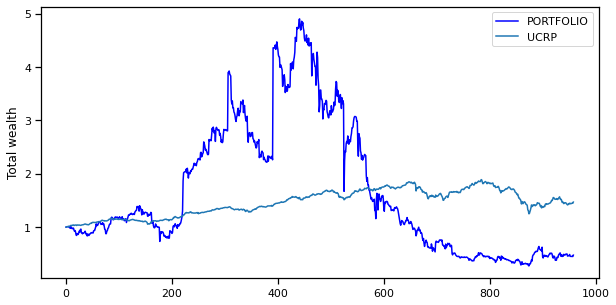

In [53]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.78
    Sharpe ratio: -0.55 ± 0.55
    Ulcer index: -0.81
    Information ratio (wrt UCRP): -0.69
    Appraisal ratio (wrt UCRP): -0.82 ± 0.51
    UCRP sharpe: 0.88 ± 0.60
    Beta / Alpha: 2.07 / -78.998%
    Annualized return: -63.00%
    Annualized volatility: 98.38%
    Longest drawdown: 650 days
    Max drawdown: 98.73%
    Winning days: 42.0%
    Annual turnover: 330.1
        
Total wealth: 0.0227495782745427


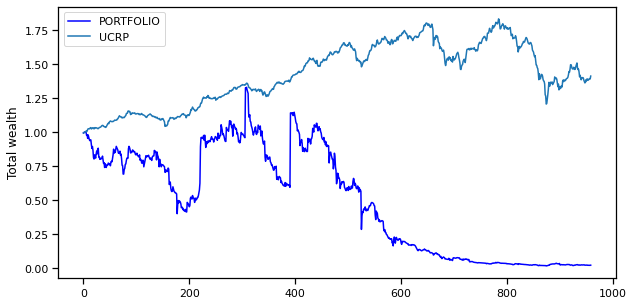

In [54]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

# MSCI

## data

<AxesSubplot:>

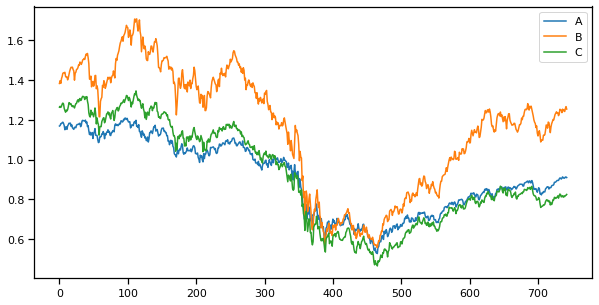

In [87]:
data = tools.dataset('msci')
data = data.iloc[300:, :].reset_index(drop=True) 
# plot first three of them as example
data.iloc[:,:3].plot()

In [88]:
data

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,1.168877,1.383092,1.263907,1.251691,1.391944,1.405595,1.525452,1.380175,1.299542,1.258852,...,1.216903,1.290011,1.373186,1.294731,1.326493,1.465191,1.259401,1.294401,1.313554,0.998081
1,1.171352,1.397050,1.268385,1.257856,1.377795,1.415579,1.532134,1.392138,1.292392,1.261352,...,1.215340,1.298886,1.383730,1.294634,1.321607,1.475386,1.258417,1.290079,1.324507,1.004798
2,1.180954,1.383686,1.262613,1.253878,1.358740,1.405299,1.520342,1.384447,1.276444,1.254851,...,1.209282,1.285573,1.375218,1.286142,1.328349,1.458200,1.266489,1.281139,1.304600,1.003551
3,1.181449,1.407345,1.268285,1.262331,1.379587,1.425662,1.522799,1.408944,1.307424,1.273255,...,1.222765,1.307859,1.398626,1.302162,1.347796,1.476940,1.268557,1.291847,1.325555,1.014299
4,1.185805,1.418036,1.279431,1.267502,1.386850,1.438316,1.536065,1.398310,1.320165,1.276855,...,1.221983,1.300365,1.412943,1.311040,1.366755,1.467910,1.280862,1.293222,1.332603,1.020058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0.906256,1.248763,0.816101,1.048926,1.021696,1.031139,1.313090,0.789878,0.852704,0.719544,...,1.203908,0.510009,0.948346,0.864312,0.806411,1.200990,1.166667,0.566896,0.496428,0.714683
739,0.906949,1.242031,0.813713,1.045048,1.011037,1.033808,1.323703,0.795670,0.847938,0.714843,...,1.222570,0.539789,0.950377,0.865856,0.811004,1.194485,1.155641,0.565324,0.497285,0.726679
740,0.912196,1.256682,0.819086,1.050219,1.008773,1.040826,1.341293,0.807064,0.857654,0.720944,...,1.229897,0.537915,0.961211,0.872901,0.810124,1.196136,1.173262,0.569450,0.504905,0.725528
741,0.912394,1.266581,0.820281,1.049423,1.004056,1.026394,1.344143,0.803361,0.854904,0.721144,...,1.231363,0.523321,0.955407,0.866628,0.804163,1.192155,1.174542,0.564735,0.501953,0.732534


## baselines

### BAH

In [89]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 0.92
    Sharpe ratio: -0.30 ± 0.60
    Ulcer index: -0.24
    Information ratio (wrt UCRP): -0.44
    Appraisal ratio (wrt UCRP): -0.36 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 0.96 / -1.089%
    Annualized return: -11.46%
    Annualized volatility: 27.55%
    Longest drawdown: 630 days
    Max drawdown: 64.42%
    Winning days: 50.3%
    Annual turnover: 0.0
        
Total wealth: 0.6983802376010737


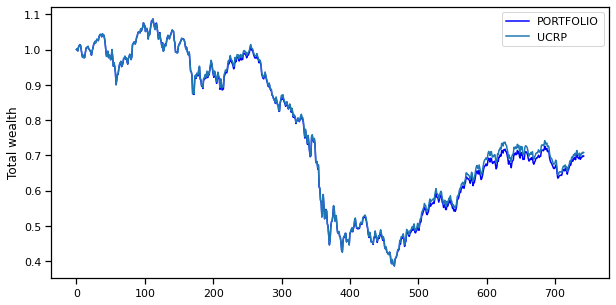

In [90]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [91]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

Summary:
    Profit factor: 0.93
    Sharpe ratio: -0.26 ± 0.59
    Ulcer index: -0.22
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): 0.00 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: -11.03%
    Annualized volatility: 28.63%
    Longest drawdown: 630 days
    Max drawdown: 64.36%
    Winning days: 50.6%
    Annual turnover: 2.4
        
Total wealth: 0.7086259568803057


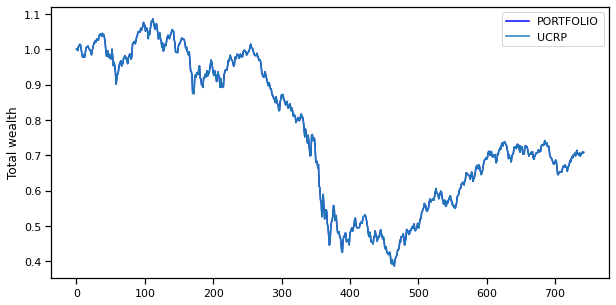

In [92]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.93
    Sharpe ratio: -0.29 ± 0.59
    Ulcer index: -0.23
    Information ratio (wrt UCRP): -4.67
    Appraisal ratio (wrt UCRP): -0.39 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.00 / -0.681%
    Annualized return: -11.63%
    Annualized volatility: 28.63%
    Longest drawdown: 630 days
    Max drawdown: 64.72%
    Winning days: 50.5%
    Annual turnover: 2.4
        
Total wealth: 0.6945401505587308


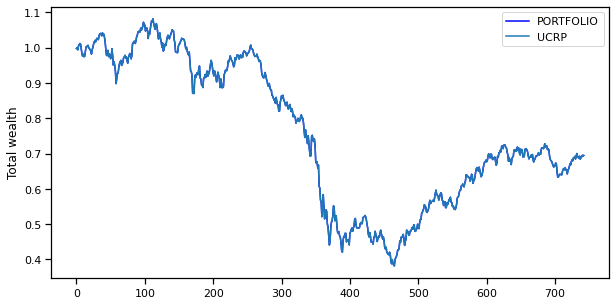

In [93]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.92
    Sharpe ratio: -0.31 ± 0.60
    Ulcer index: -0.25
    Information ratio (wrt UCRP): -4.67
    Appraisal ratio (wrt UCRP): -0.72 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.00 / -1.362%
    Annualized return: -12.23%
    Annualized volatility: 28.63%
    Longest drawdown: 630 days
    Max drawdown: 65.07%
    Winning days: 50.4%
    Annual turnover: 2.4
        
Total wealth: 0.6807296986011551


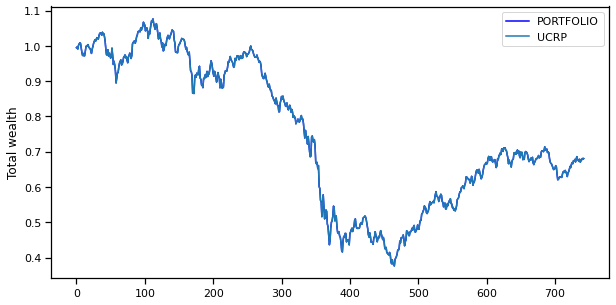

In [94]:
result.fee = 0.0050
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [95]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.38
    Sharpe ratio: 1.96 ± 0.99
    Ulcer index: 5.85
    Information ratio (wrt UCRP): 3.32
    Appraisal ratio (wrt UCRP): 3.19 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.12 / 90.276%
    Annualized return: 107.40%
    Annualized volatility: 41.79%
    Longest drawdown: 166 days
    Max drawdown: 55.28%
    Winning days: 57.9%
    Annual turnover: 448.4
        
Total wealth: 8.591643808298432


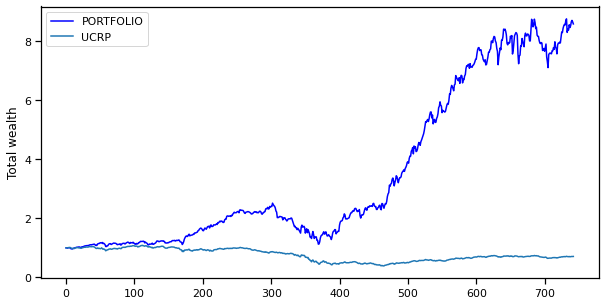

In [96]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.84
    Sharpe ratio: -0.72 ± 0.65
    Ulcer index: -0.59
    Information ratio (wrt UCRP): -0.85
    Appraisal ratio (wrt UCRP): -0.78 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.11 / -20.984%
    Annualized return: -31.41%
    Annualized volatility: 40.66%
    Longest drawdown: 742 days
    Max drawdown: 77.53%
    Winning days: 46.7%
    Annual turnover: 448.4
        
Total wealth: 0.3290682458440993


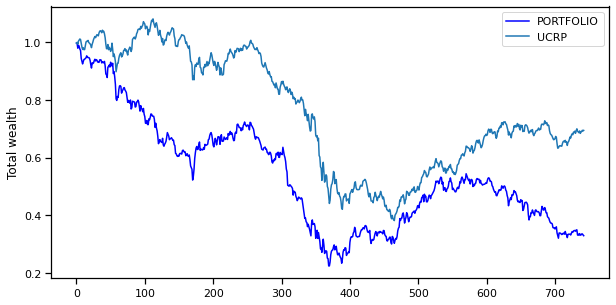

In [97]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.51
    Sharpe ratio: -3.55 ± 1.57
    Ulcer index: -1.68
    Information ratio (wrt UCRP): -5.47
    Appraisal ratio (wrt UCRP): -5.14 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.10 / -132.245%
    Annualized return: -77.44%
    Annualized volatility: 39.62%
    Longest drawdown: 742 days
    Max drawdown: 98.75%
    Winning days: 35.2%
    Annual turnover: 448.4
        
Total wealth: 0.01240582719517272


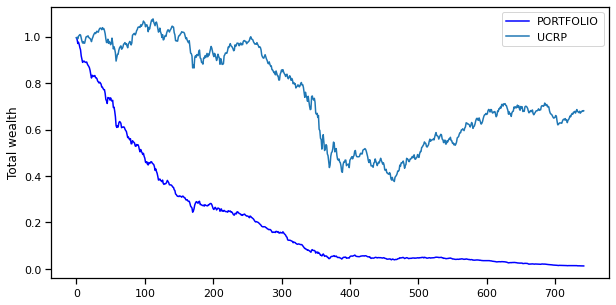

In [98]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [99]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.32
    Sharpe ratio: 1.74 ± 0.92
    Ulcer index: 6.55
    Information ratio (wrt UCRP): 2.87
    Appraisal ratio (wrt UCRP): 2.81 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.19 / 87.306%
    Annualized return: 97.56%
    Annualized volatility: 45.07%
    Longest drawdown: 114 days
    Max drawdown: 48.06%
    Winning days: 56.1%
    Annual turnover: 344.9
        
Total wealth: 7.445147780272965


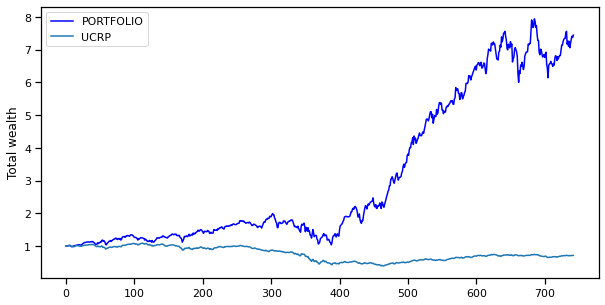

In [100]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.93
    Sharpe ratio: -0.17 ± 0.59
    Ulcer index: -0.21
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): 0.05 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.18 / 1.456%
    Annualized return: -15.62%
    Annualized volatility: 43.62%
    Longest drawdown: 738 days
    Max drawdown: 71.98%
    Winning days: 48.6%
    Annual turnover: 344.9
        
Total wealth: 0.6061732404209216


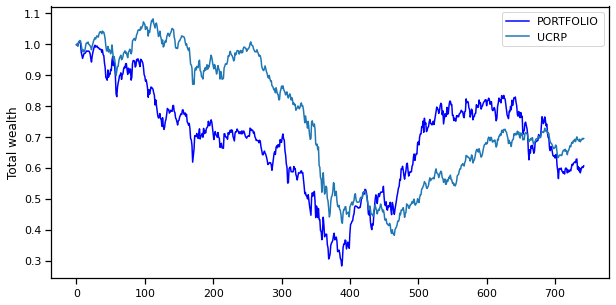

In [101]:
result.fee = 0.0025
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.64
    Sharpe ratio: -2.20 ± 1.08
    Ulcer index: -1.21
    Information ratio (wrt UCRP): -3.23
    Appraisal ratio (wrt UCRP): -3.05 ± 0.58
    UCRP sharpe: -0.26 ± 0.59
    Beta / Alpha: 1.17 / -84.395%
    Annualized return: -64.11%
    Annualized volatility: 42.45%
    Longest drawdown: 738 days
    Max drawdown: 95.26%
    Winning days: 40.4%
    Annual turnover: 344.9
        
Total wealth: 0.048739424629060994


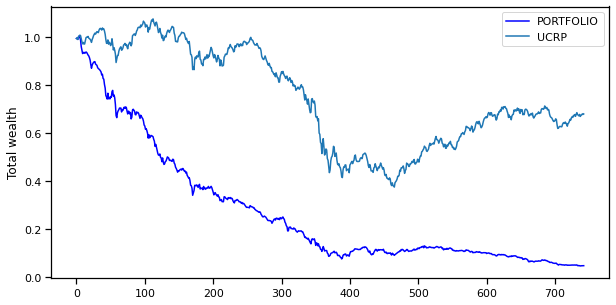

In [102]:
result.fee = 0.005
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);